In [2]:
import numpy as np
import matplotlib.pyplot as plt

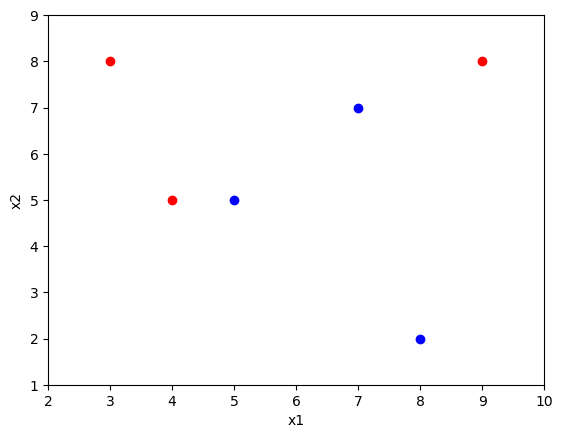

In [3]:
plt.plot([8, 5, 7], [2, 5, 7], 'bo')
plt.plot([9, 3, 4], [8, 8, 5], 'ro')
plt.axis((2, 10, 1, 9))
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

In [6]:
x1 = np.array([8, 5, 7, 9, 3, 4])
x2 = np.array([2, 5, 7, 8, 8, 5])
x0 = np.array([1]*6)
X = np.array([x0, x1, x2])
X = X.T
y = np.array([1, 1, 1, 0, 0, 0])

In [8]:
# define a sigmoid function
def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [10]:
# define the dot produt function for w and X:
def dotproduct(w, X):
    dp = []
    for row in X:
        dp.append(w.dot(row))
    dp = np.array(dp)
    return dp

In [12]:
# define the funtion to get mu:
def mufunction(dp):
    mu = []
    for elem in dp:
        mu.append(sigmoid(elem))
    mu = np.array(mu)
    return mu

In [14]:
# define the gradient derivative function:
def gradientfunc(mu, X, y):
    X_trans = X.T
    g = X_trans.dot(mu - y)
    return g

In [16]:
# define the Hessian matrix function:
def hessianmatrix(mu, X):
    s = []
    for elem in mu:
        s.append(elem*(1-elem))
    s = np.array(s)
    S = np.diag(s)
    h = X.T.dot(S).dot(X)
    return h

In [18]:
# Newton's method to update the value of w:
def update(w, X, y):
    dp = dotproduct(w, X)
    mu = mufunction(dp)
    g = gradientfunc(mu, X, y)
    h = hessianmatrix(mu, X)
    h_inv = np.linalg.inv(h)
    w = w- h_inv.dot(g)
    return w

In [20]:
w = np.array([0, 0, 0])
for i in range(10):
    w = update(w,X,y)
    print(np.round(w, decimals = 2))

[ 1.56  0.22 -0.49]
[ 2.4   0.38 -0.78]
[ 3.23  0.58 -1.09]
[ 4.1   0.83 -1.48]
[ 5.22  1.18 -2.02]
[ 6.05  1.44 -2.41]
[ 6.15  1.47 -2.45]
[ 6.15  1.47 -2.45]
[ 6.15  1.47 -2.45]
[ 6.15  1.47 -2.45]


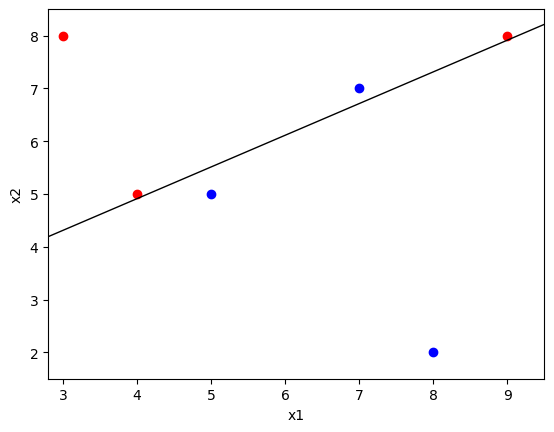

In [22]:
x1 = np.linspace(2, 10, 100)
x2 = (1.47/2.45)*x1 + 6.15/2.45
plt.plot([8, 5, 7], [2, 5, 7], 'bo')
plt.plot([9, 3, 4], [8, 8, 5], 'ro')
plt.plot(x1, x2, linewidth=1, color='black')
plt.axis((2.8, 9.5, 1.5, 8.5))
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

In [24]:
# for a modified dataset, because the first dataset is not linearly separable
x1 = np.array([8, 5, 7, 7, 3, 4])
x2 = np.array([2, 5, 7, 8, 8, 5])
x0 = np.array([1]*6)
X = np.array([x0, x1, x2])
X = X.T
y = np.array([1, 1, 1, 0, 0, 0])

In [26]:
w = np.array([0, 0, 0])
for i in range(10):
    w = update(w,X,y)
    print(np.round(w, decimals = 2))

[-0.37  0.46 -0.38]
[ 0.05  0.8  -0.76]
[ 0.89  1.71 -1.71]
[ 2.25  4.44 -4.44]
[ 3.36  6.65 -6.66]
[ 4.39  8.73 -8.73]
[  5.41  10.75 -10.75]
[  6.41  12.76 -12.76]
[  7.41  14.76 -14.77]
[  8.41  16.77 -16.77]


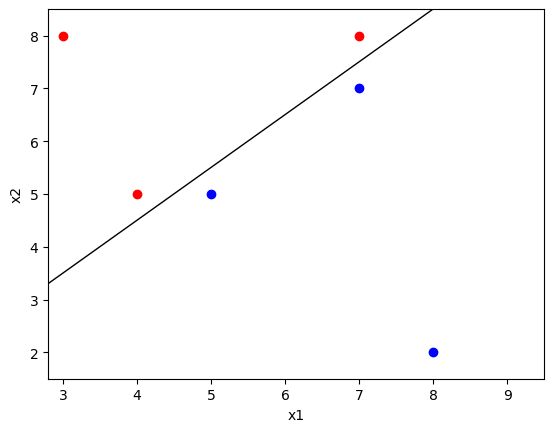

In [28]:
x1 = np.linspace(2, 10, 100)
x2 = (16.77/16.77)*x1 + 8.41/16.77
plt.plot([8, 5, 7], [2, 5, 7], 'bo')
plt.plot([7, 3, 4], [8, 8, 5], 'ro')
plt.plot(x1, x2, linewidth=1, color='black')
plt.axis((2.8, 9.5, 1.5, 8.5))
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()